In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA


In [5]:
data = pd.read_csv("X_train_new.csv", header=0, index_col=0)
# X = data.drop(["RP to CMD", "CMD to NARR"], axis=1)
targets = ["RP to CMD", "CMD to NARR", "RP to CMD or CMD to NARR", "RP to CMD and CMD to NARR"]
ys = {target: data[target] for target in targets}

X = data.drop(targets, axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X.head(10)

,average_message_length,avg_num_words_between_commands,avg_time_between_message_and_command,event_count,message_count,message_to_command_ratio,num_participants,num_turns,num_words_per_turn,ratio_of_commands_without_message
instance_id,,,,,,,,,,
1654467220-3c445dcd-c960-437a-9089-3d03e0f1f73b,12.701149,22.100000,29.071610,280.0,194.0,0.252577,5.0,10.0,80.700000,0.081633
1654571556-606ff8a8-985e-472b-a7d7-f2f364387b3d,10.695209,137.176471,72.275350,1232.0,1126.0,0.059503,10.0,10.0,46.400000,0.014925
1654734791-06be138a-af1f-47d1-b227-5d3930da5b9a,6.035294,3.631206,196.275083,649.0,382.0,0.366492,5.0,30.0,15.666667,0.000000
1654915901-d1d4f494-d9ec-42fa-89f3-6c2677660744,1.000000,0.125000,6.862357,61.0,38.0,0.394737,2.0,1.0,0.000000,0.533333
1655284168-6b0568f9-e875-4558-945b-ca98feb21738,1.000000,0.176471,9.898698,70.0,36.0,0.444444,2.0,1.0,2.000000,0.062500
1655445995-8439c379-489d-45c6-9383-e89db3bc1c39,1.800000,0.300000,8.198237,122.0,62.0,0.467742,2.0,6.0,1.333333,0.172414
1655555147-055c1cca-28ef-4e04-8422-5e372abeefe0,1.000000,0.363636,183.855143,47.0,31.0,0.322581,2.0,0.0,0.000000,0.000000
1655566304-d4a14bee-22a1-4ad6-b0f6-b39d3ec382e4,5.439093,28.153846,72616.850263,596.0,498.0,0.128514,11.0,7.0,31.142857,0.125000
1655610726-37e50a0c-b4d3-4b9c-a073-7157c0ffbd8f,1.333333,0.076923,71.712767,206.0,113.0,0.451327,4.0,7.0,0.428571,0.705882


In [6]:
pca = PCA(5)
projected = pca.fit_transform(X_scaled)
print(X_scaled.shape)
print(projected.shape)

(102, 10)
(102, 5)


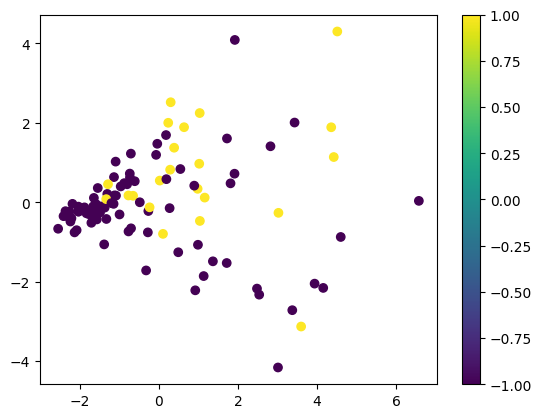

In [7]:
plt.scatter(projected[:, 0], projected[:, 1], c=data["RP to CMD or CMD to NARR"])
plt.colorbar()

In [44]:
pca.components_

array([[ 0.25249212,  0.31373183,  0.12768525,  0.44684201,  0.46171859,
        -0.34772526,  0.32614661,  0.26397217,  0.18718186, -0.27687882],
       [ 0.40758512,  0.40835788, -0.01230455, -0.34728132, -0.23861581,
        -0.36592306, -0.07046871, -0.5134781 ,  0.29121181, -0.04577546],
       [ 0.09063935, -0.33400513,  0.44518314, -0.05428156, -0.15095258,
         0.14625262, -0.30664183,  0.21454984,  0.60276111, -0.36267375],
       [-0.23093988, -0.04862302,  0.69847365,  0.00498046,  0.04660114,
         0.02211555,  0.44824515, -0.33543563,  0.06775754,  0.36840157],
       [ 0.49905496, -0.03206887, -0.19894301,  0.09835898,  0.05090493,
         0.34996474,  0.08742464,  0.17070112,  0.35956985,  0.63994052]])

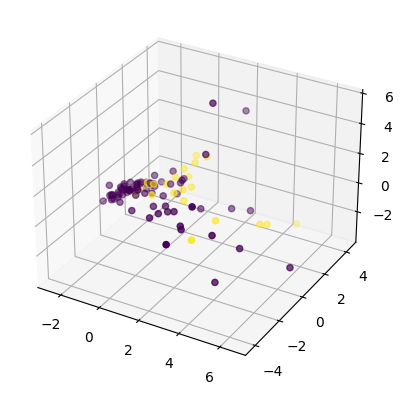

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c=data["RP to CMD or CMD to NARR"])
plt.show()

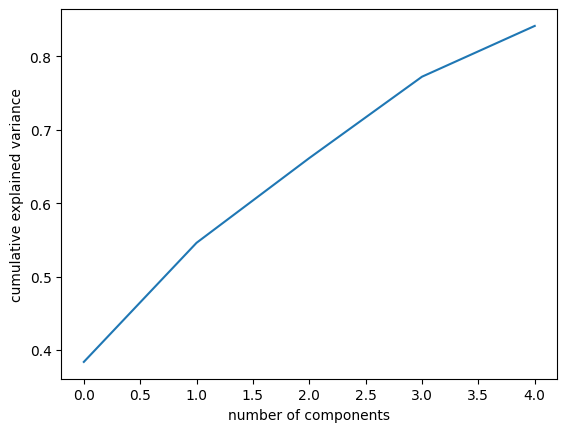

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');